Максимум функции в точке (5.1213, 5.1213) = 18120.9735
Минимум функции в точке (0.8787, 0.8787) = 2.7765


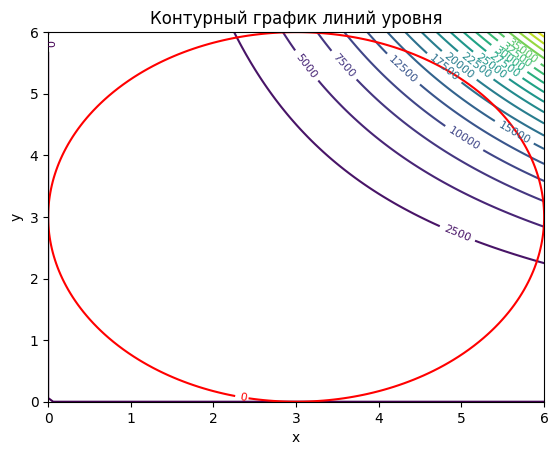

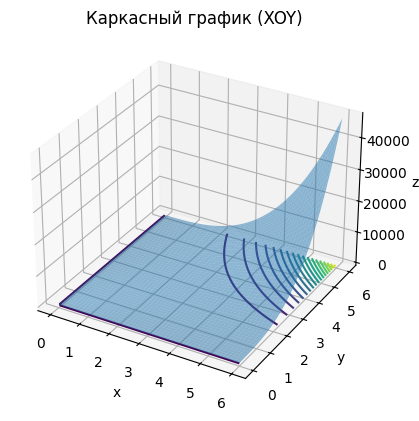

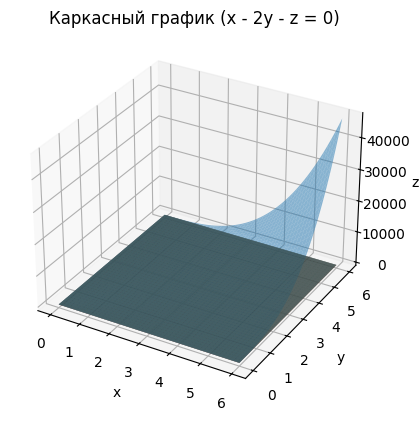

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve

# Определение функции
def f(x, y):
    return x**3 * y**3 + 3*x*y

# Определение ограничения
def g(x, y):
    return (x - 3)**2 + (y - 3)**2 - 9

# Создание сетки значений x и y
x = np.linspace(0, 6, 100)
y = np.linspace(0, 6, 100)
X, Y = np.meshgrid(x, y)

# Вычисление значений функции и ограничения
Z = f(X, Y)
C = g(X, Y)

# Построение контурного графика линий уровня функции и ограничения
fig, ax = plt.subplots()
contour_f = ax.contour(X, Y, Z, levels=20)
contour_g = ax.contour(X, Y, C, levels=[0], colors='red')
ax.clabel(contour_f, inline=True, fontsize=8)
ax.clabel(contour_g, inline=True, fontsize=8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Контурный график линий уровня')

# Приближенное определение координат точек экстремума
# по графику
x_max_approx = 4.2
y_max_approx = 4.2
x_min_approx = 1.8
y_min_approx = 1.8

# Определение функции Лагранжа
def L(args):
    x, y, l = args
    return f(x, y) + l * g(x, y)

# Вычисление частных производных функции Лагранжа
def grad_L(args):
    x, y, l = args
    dL_dx = 3*x**2 * y**3 + 3*y + 2*l*(x - 3)
    dL_dy = 3*x**3 * y**2 + 3*x + 2*l*(y - 3)
    dL_dl = g(x, y)
    return [dL_dx, dL_dy, dL_dl]

# Решение системы уравнений на стационарные точки
# с помощью метода Ньютона
x0 = [x_max_approx, y_max_approx, 0]
sol = fsolve(grad_L, x0)
x_max, y_max, l_max = sol

x0 = [x_min_approx, y_min_approx, 0]
sol = fsolve(grad_L, x0)
x_min, y_min, l_min = sol

# Вывод результатов
print(f"Максимум функции в точке ({x_max:.4f}, {y_max:.4f}) = {f(x_max, y_max):.4f}")
print(f"Минимум функции в точке ({x_min:.4f}, {y_min:.4f}) = {f(x_min, y_min):.4f}")

# Построение каркасного графика функции с линиями,
# параллельными плоскости XOY
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5)
ax.contour(X, Y, Z, zdir='z', offset=-100, levels=20)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Каркасный график (XOY)')

# Построение каркасного графика функции с линиями,
# параллельными плоскости x - 2y - z = 0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5)
for i in np.linspace(-50, 50, 10):
    ax.plot_surface(X, Y, X - 2*Y + i, alpha=0.2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Каркасный график (x - 2y - z = 0)')

plt.show()

A) Стационарная точка: x = 9.0000, y = 4.0000
   Значение функции в стационарной точке: f(9.0000, 4.0000) = 30.0000

Б) f(25, 0) = 50.0000
   Значение f(25, 0) больше чем значение в стационарной точке.


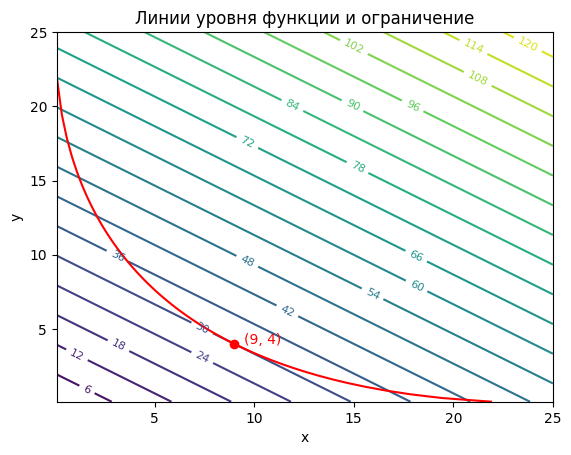

'\nМетод множителей Лагранжа не может найти максимум в этой задаче, \nпотому что он находит только стационарные точки внутри области определения. \nВ данном случае, максимум достигается на границе области, \nопределяемой условием √x + √y = 5. \n\nТочка (9, 4) особенная, так как в ней достигается максимум функции \nпри заданном ограничении.  Это можно увидеть на графике: \nлиния уровня, проходящая через точку (9, 4), \nкасается графика ограничения. \n\nМетод Лагранжа не может "увидеть" этот максимум, \nтак как он ищет точки, где градиенты функции и ограничения коллинеарны. \nВ точке (9, 4) градиент функции направлен в сторону увеличения значений, \nно он "упирается" в границу области.\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Определение функции и ограничения
def f(x, y):
  return 2*x + 3*y

def g(x, y):
  return np.sqrt(x) + np.sqrt(y) - 5

# A. Метод множителей Лагранжа

# Функция Лагранжа
def lagrange(vars):
  x, y, l = vars
  return [
    2 - l/(2*np.sqrt(x)),  # df/dx = lambda * dg/dx
    3 - l/(2*np.sqrt(y)),  # df/dy = lambda * dg/dy
    np.sqrt(x) + np.sqrt(y) - 5  # Уравнение ограничения
  ]

# Решение системы уравнений для нахождения стационарных точек
initial_guess = [9, 4, 1]
solution = fsolve(lagrange, initial_guess)
x_s, y_s, l_s = solution

print(f"A) Стационарная точка: x = {x_s:.4f}, y = {y_s:.4f}")
print(f"   Значение функции в стационарной точке: f({x_s:.4f}, {y_s:.4f}) = {f(x_s, y_s):.4f}")

# Б. Вычисление f(25, 0)
f_25_0 = f(25, 0)
print(f"\nБ) f(25, 0) = {f_25_0:.4f}")
print(f"   Значение f(25, 0) {'больше' if f_25_0 > f(x_s, y_s) else 'меньше'} чем значение в стационарной точке.")

# В. Графическое решение

# Создание сетки для графика
x = np.linspace(0.1, 25, 100)  # x > 0
y = np.linspace(0.1, 25, 100)  # y > 0
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Построение контурного графика функции и ограничения
fig, ax = plt.subplots()
contour = ax.contour(X, Y, Z, levels=20)
constraint = ax.contour(X, Y, g(X, Y), levels=[0], colors='red')
ax.clabel(contour, inline=True, fontsize=8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Линии уровня функции и ограничение')

# Отображение точки (9, 4) на графике
ax.plot(9, 4, 'ro')
ax.text(9.5, 4, '(9, 4)', color='red')

plt.show()

# Г. Объяснение

"""
Метод множителей Лагранжа не может найти максимум в этой задаче, 
потому что он находит только стационарные точки внутри области определения. 
В данном случае, максимум достигается на границе области, 
определяемой условием √x + √y = 5. 

Точка (9, 4) особенная, так как в ней достигается максимум функции 
при заданном ограничении.  Это можно увидеть на графике: 
линия уровня, проходящая через точку (9, 4), 
касается графика ограничения. 

Метод Лагранжа не может "увидеть" этот максимум, 
так как он ищет точки, где градиенты функции и ограничения коллинеарны. 
В точке (9, 4) градиент функции направлен в сторону увеличения значений, 
но он "упирается" в границу области.
"""